# Detrend Data<a id='top' class="tocSkip"> </a>

This tutorial shows how to detrend data - a commonly-used technique prior to detailed climate data analysis - using [CDAT](https://cdat.llnl.gov).

[Download this Jupyter Notebook](Detrend_data.ipynb)

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Prepare-Notebook-and-Data" data-toc-modified-id="Prepare-Notebook-and-Data-1">Prepare Notebook and Data</a></span><ul class="toc-item"><li><span><a href="#Download-Data" data-toc-modified-id="Download-Data-1.1">Download Data</a></span></li><li><span><a href="#Open-Data-File,-Extract-Variable" data-toc-modified-id="Open-Data-File,-Extract-Variable-1.2">Open Data File, Extract Variable</a></span></li></ul></li><li><span><a href="#Data-Exploration" data-toc-modified-id="Data-Exploration-2">Data Exploration</a></span></li><li><span><a href="#Order-of-Operations-Matters" data-toc-modified-id="Order-of-Operations-Matters-3">Order of Operations Matters</a></span><ul class="toc-item"><li><span><a href="#Numerical-Example" data-toc-modified-id="Numerical-Example-3.1">Numerical Example</a></span></li><li><span><a href="#Climate-Data-Example" data-toc-modified-id="Climate-Data-Example-3.2">Climate Data Example</a></span><ul class="toc-item"><li><span><a href="#Test-Case-1:-Removing-the-Annual-Cycle,-then-Creating-a-Time-Series" data-toc-modified-id="Test-Case-1:-Removing-the-Annual-Cycle,-then-Creating-a-Time-Series-3.2.1">Test Case 1: Removing the Annual Cycle, then Creating a Time Series</a></span></li><li><span><a href="#Test-Case-2:-Creating-the-Time-Series,-then-Removing-the-Annual-Cycle" data-toc-modified-id="Test-Case-2:-Creating-the-Time-Series,-then-Removing-the-Annual-Cycle-3.2.2">Test Case 2: Creating the Time Series, then Removing the Annual Cycle</a></span></li></ul></li></ul></li><li><span><a href="#Detrend-Data" data-toc-modified-id="Detrend-Data-4">Detrend Data</a></span><ul class="toc-item"><li><span><a href="#Set-Up" data-toc-modified-id="Set-Up-4.1">Set Up</a></span></li><li><span><a href="#Removing-the-Trend" data-toc-modified-id="Removing-the-Trend-4.2">Removing the Trend</a></span></li></ul></li></ul></div>

## Prepare Notebook and Data
[Back to Top](#top)

In [1]:
from __future__ import print_function
import cdms2
import MV2
import genutil
import cdutil
import vcs
import os
import requests

### Download Data
The following CMIP5 NetCDF file contains Near-Surface Air Temperature data in degrees Kelvin (K) over North America. It is downloaded to the directory where this notebook is stored.

In [2]:
filename = 'tas_Amon_IPSL-CM5A-LR_1pctCO2_r1i1p1_185001-198912.nc'
if not os.path.exists(filename):
    r = requests.get("https://cdat.llnl.gov/cdat/sample_data/notebooks/{}".format(filename), stream=True)
    with open(filename,"wb") as f:
        for chunk in r.iter_content(chunk_size=1024):
            if chunk:  # filter local_filename keep-alive new chunks
                f.write(chunk)

### Open Data File, Extract Variable
The following two lines of code open the file just downloaded to your local computer (`filename`), extract data for the Near-Surface Air Temperature (`tas`) and assign it to the variable `data`.

In [3]:
f = cdms2.open(filename)

data = f("tas")

The following line of code uses the `.info()` method to allow us to take a quick look at the structure of the temperature data stored in the ```data``` variable.  

There are 1680 different time values which are measured as "days since 1850-01-01 00:00:00". The range of the time values is the difference between the last value (51084.5) and the first value (15.5) which equals 51069 days. If we divide this range by the number of values in the dataset (51069/1680) we get an average time duration for each data point of 30.398 days which tells us that we are working with monthly data.

Since this file is a subset of the globe, the data cover 13 latitude bands and 16 longitude values. The first and last values of latitude (~25.6 to ~48.3) and longitude (-123.75 to -67.5) tell us we are looking at the continental United States.

In [4]:
data.info()

*** Description of Slab tas ***
id: tas
shape: (1680, 13, 16)
filename: 
missing_value: 1e+20
comments: 
grid_name: <None>
grid_type: generic
time_statistic: 
long_name: Near-Surface Air Temperature
units: K
tileIndex: None
original_name: t2m
associated_files: baseURL: http://cmip-pcmdi.llnl.gov/CMIP5/dataLocation gridspecFile: gridspec_atmos_fx_IPSL-CM5A-LR_1pctCO2_r0i0p0.nc areacella: areacella_fx_IPSL-CM5A-LR_1pctCO2_r0i0p0.nc
coordinates: height
standard_name: air_temperature
cell_methods: time: mean (interval: 30 minutes)
cell_measures: area: areacella
history: 2011-03-07T11:45:34Z altered by CMOR: Treated scalar dimension: 'height'. 2011-03-07T11:45:34Z altered by CMOR: replaced missing value flag (9.96921e+36) with standard missing value (1e+20). 2011-03-07T11:45:34Z altered by CMOR: Inverted axis: lat.
Grid has Python id 0x12d479fd0.
Gridtype: generic
Grid shape: (13, 16)
Order: yx
** Dimension 1 **
   id: time
   Designated a time axis.
   units:  days since 1850-01-01 00:00:0

## Data Exploration
[Back to Top](#top)

First, to get a feel for the data, let's create a time series of the raw data that will span the entire 1680 time values in the data file. In creating this time series, the `averager` function will focus on a single time value at a time, will take the temperature data for the entire Earth for that time value and do a spatial average to yield a single global temperature value for each time value in the data set. (Note that the latitude and longitude dimensions are removed by this action, as shown with the ```.shape``` method, since we are creating a global average temperature for each time value.)

In [5]:
data_ts = genutil.averager(data, axis='xy')
data_ts.shape

(1680,)

In the next line of code, let's take a look at this time series of a single average temperature for the globe at each time value. Note the annual cycle and the warming trend over time.

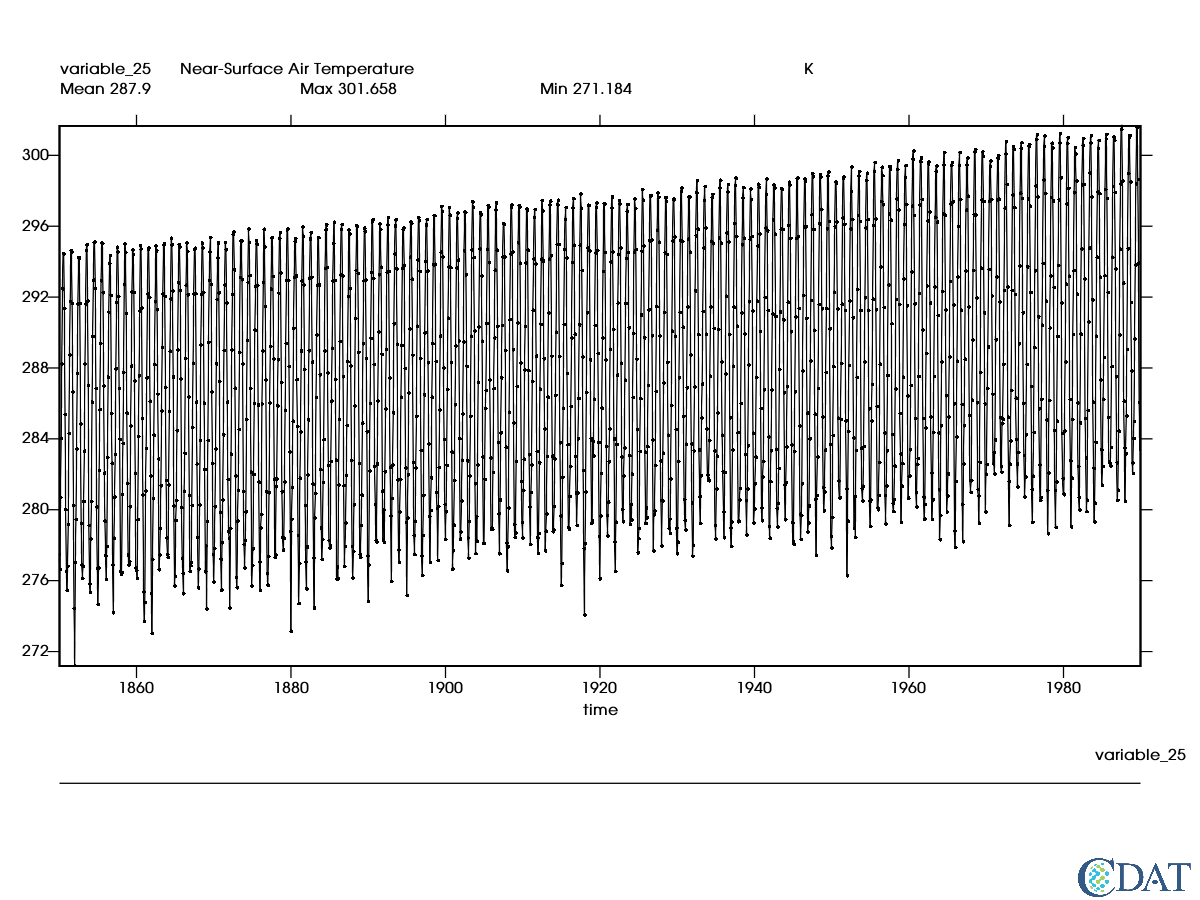

In [6]:
x = vcs.init(bg=True, geometry=(1200,900))
line = vcs.create1d()
line.markersize = .5
x.plot(data_ts, line)

To demonstrate `genutil`'s capabilities and highlight that the order of operations matters for data where some values are missing, we'll try two test cases: 

1. Removing the annual cycle from the data, then creating a time series (Test Case 1) and
2. Creating a time series, then removing the annual cycle (Test Case 2).

But first, let's look at a numerical example to illustrate that the order in which you perform operations makes a difference.

## Order of Operations Matters

### Numerical Example
[Back to Top](#top)

If data is missing from a dataset, the order in which operations are performed matters. The following is a numerical example of averaging values two different ways. 

Let's say we have the following dataset where the X direction is defined as horizontal rows, and Y is vertical columns:

| | Y1 | Y2 | Y3 | Y4 |
|:---:|:---:|:---:|:---:|:---:|
| X1 | *3* | *4* | - | *7* |
| X2 | - | *5* | - | - |
| X3 | *1* | *2* | *5* | *5* |
| X4 | - | - | *6* | *4* |


Creating this dataset using a numpy array we have:

In [7]:
import numpy
array = numpy.array([[3,4,999,7], [999,5,999,999],[1,2,5,5],[999,999,6,4.]])
array

array([[  3.,   4., 999.,   7.],
       [999.,   5., 999., 999.],
       [  1.,   2.,   5.,   5.],
       [999., 999.,   6.,   4.]])

Masking the 999 values leads to the following:

In [8]:
masked = numpy.ma.masked_equal(array, 999.)
masked

masked_array(
  data=[[3.0, 4.0, --, 7.0],
        [--, 5.0, --, --],
        [1.0, 2.0, 5.0, 5.0],
        [--, --, 6.0, 4.0]],
  mask=[[False, False,  True, False],
        [ True, False,  True,  True],
        [False, False, False, False],
        [ True,  True, False, False]],
  fill_value=999.0)

**If we average over X first, then average over Y, we get (4.667 + 5.000 + 3.250 + 5.000) / 4 = 4.479**

| | Y1 | Y2 | Y3 | Y4 | Average |
|---|---|---|---|---|---|
| X1 | *3* | *4* | - | *7* | **4.667**
| X2 | - | *5* | - | - | **5.000**
| X3 | *1* | *2* | *5* | *5* | **3.250**
| X4 | - | - | *6* | *4* | **5.000**
| Average |  |  |  |  | **4.479**

Verifying this with code gives:

In [9]:
print("X, Y:", numpy.ma.average(numpy.ma.average(masked, axis=-1)))

X, Y: 4.479166666666667


**If we average over Y first, then over X, we get (2.000 + 3.667 + 5.500 + 5.333) / 4 = 4.125**

| | Y1 | Y2 | Y3 | Y4 | Average |
|---|---|---|---|---|---|
| X1 | *3* | *4* | - | *7* | 
| X2 | - | *5* | - | - | 
| X3 | *1* | *2* | *5* | *5* | 
| X4 | - | - | *6* | *4* | 
| Average | **2.000** | **3.667** | **5.500** | **5.333** | **4.125**

Verifying this with code yields:

In [10]:
print("Y, X:", numpy.ma.average(numpy.ma.average(masked, axis=0)))

Y, X: 4.125


**Finally if we average using all 16 cells at once, we get (3 + 4 + 7 + 5 + 1 + 2 + 5 + 5 + 6 + 4) / 10 = 4.200**

In [11]:
print("All:", numpy.ma.average(masked))

All: 4.2


Comparing the three different averaging sequencies/methods gives 4.479, 4.125, and 4.200.

**QUESTION: SHOULD WE SAY SOMETHING ABOUT HOW OFTEN TAKING THE AVERAGE OF AN AVERAGE IS NOT THE CORRECT WAY TO ANALYZE DATA AND THEREFORE SHOULD GENERALLY BE AVOIDED, HOWEVER IN THE CASE OF CLIMATE DATA IT IS OK BECAUSE ...**

### Climate Data Example
[Back to Top](#top)

First we need to create a dataset that has missing values, so we'll mask (delete) some data and call the resulting dataset ```datamskd```.

We'll delete, or mask, all data values that fall in the range between the maximum temperature of the dataset and 2 degrees less than the maximum temperature - `data.max()-2`. All temperatures are in degrees Kelvin (K).

In [12]:
datamskd = MV2.masked_greater(data, data.max()-2)

#### Test Case 1: Removing the Annual Cycle, then Creating a Time Series

First we will remove the annual cycle for these monthly data. Because the data are masked (i.e. some data are missing) the order of operation matters, as we will demonstrate.

In the next line of code, the ```ANNUALCYCLE.departures``` calculates the average monthly temperature value for each of the 12 months in a year over the complete time period for each location in the input data file and determines the departure of each temperature (at each time and location) from the average monthly value. 

For example, once an average January value for the entire dataset has been calculated, each January value in the dataset is subtracted from that average January value to yield a series of January departures for each year in the data set. Since there are 1680 months in the dataset, there are 1680/12 = 140 years of data, and therefore 140 January departures. Since there are 140 Februaries, 140 Marches, etc. there are 140 departures x 12 months = 1680 departures for each location in the dataset, as the ```.shape``` method shows (1680 departure values by 13 latitude bands, by 16 longitude values).

In [13]:
datamskd_departures = cdutil.times.ANNUALCYCLE.departures(datamskd) # extract the departures of the masked data.

In [14]:
datamskd_departures.shape

(1680, 13, 16)

The following line of code creates a time series of the data departures which spatially averages all the departures to a single global temperature value for each time value in the masked dataset, as the ```.shape``` method shows (i.e. there is no more latitude or longitude information).

In [15]:
datamskd_departures_ts = genutil.averager(datamskd_departures, axis='xy') # create time series of the masked data departures.

In [16]:
datamskd_departures_ts.shape

(1680,)

Let's plot the resulting time series of the departures (i.e. the result of removing the annual cycle, then creating a time series). Notice how, with the annual cycle removed, it is easier to see the trend and the natural variability in the temperature values.

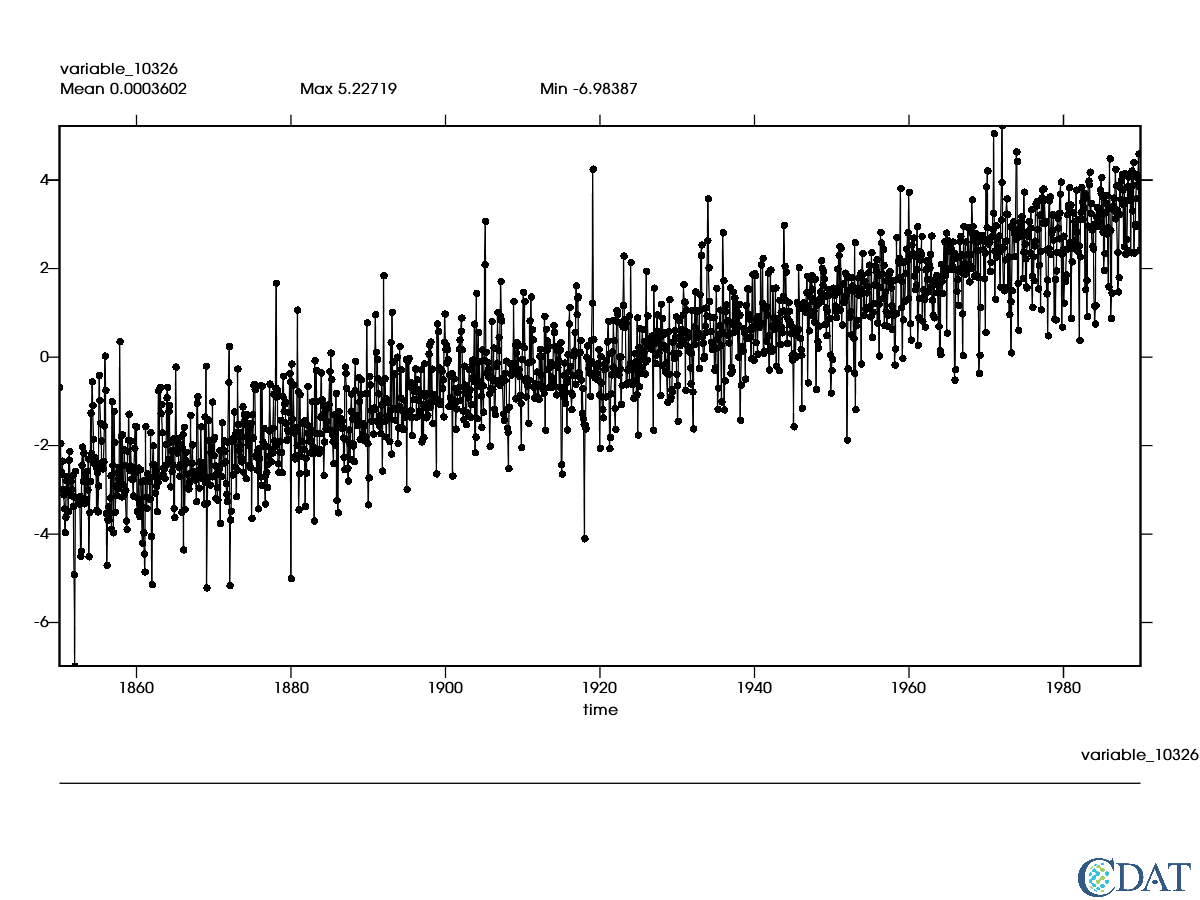

In [17]:
x.clear()
x.plot(datamskd_departures_ts)

#### Test Case 2: Creating the Time Series, then Removing the Annual Cycle
[Back to Top](#top)

Now let's calculate the time series, then remove the annual cycle and compare with the first test case.

As we did for the unmasked data above, the next line of code calculates the time series of the masked dataset by spatially averaging the temperature values at all latitude and longitude locations for each time value to give a single global temperature value for the masked dataset. (The ```.shape``` method, shows we are looking at 1680 values with no latitude or longitude, as expected.)

In [18]:
datamskd_ts = genutil.averager(datamskd, axis='xy')

In [19]:
datamskd_ts.shape

(1680,)

Let's take a look at this time series of the masked data. Note the trend and the annual cycle are similar to what we saw with the unmasked data.

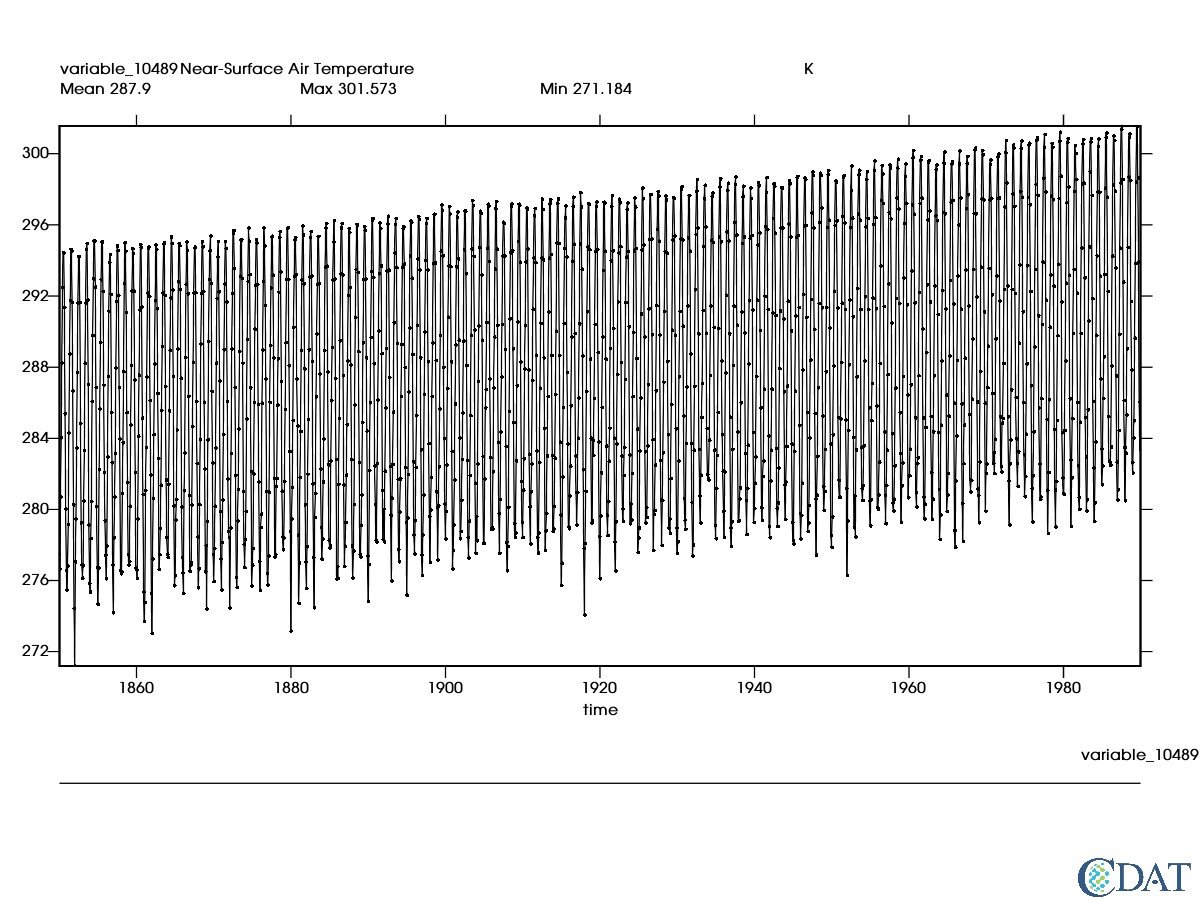

In [20]:
x = vcs.init(bg=True, geometry=(1200,900))
line = vcs.create1d()
line.markersize = .5
x.plot(datamskd_ts, line)

Next we'll remove the annual cycle by using the ```ANNUALCYCLE.departures``` method like we did in the first test case above. Again, the method calculates an average temperature value for each month of the year and determines the departure of the temperature at each time value from the average monthly temperature, effectively removing the annual cycle from the data. 

In [21]:
datamskd_ts_departures = cdutil.times.ANNUALCYCLE.departures(datamskd_ts)
datamskd_ts_departures.shape

(1680,)

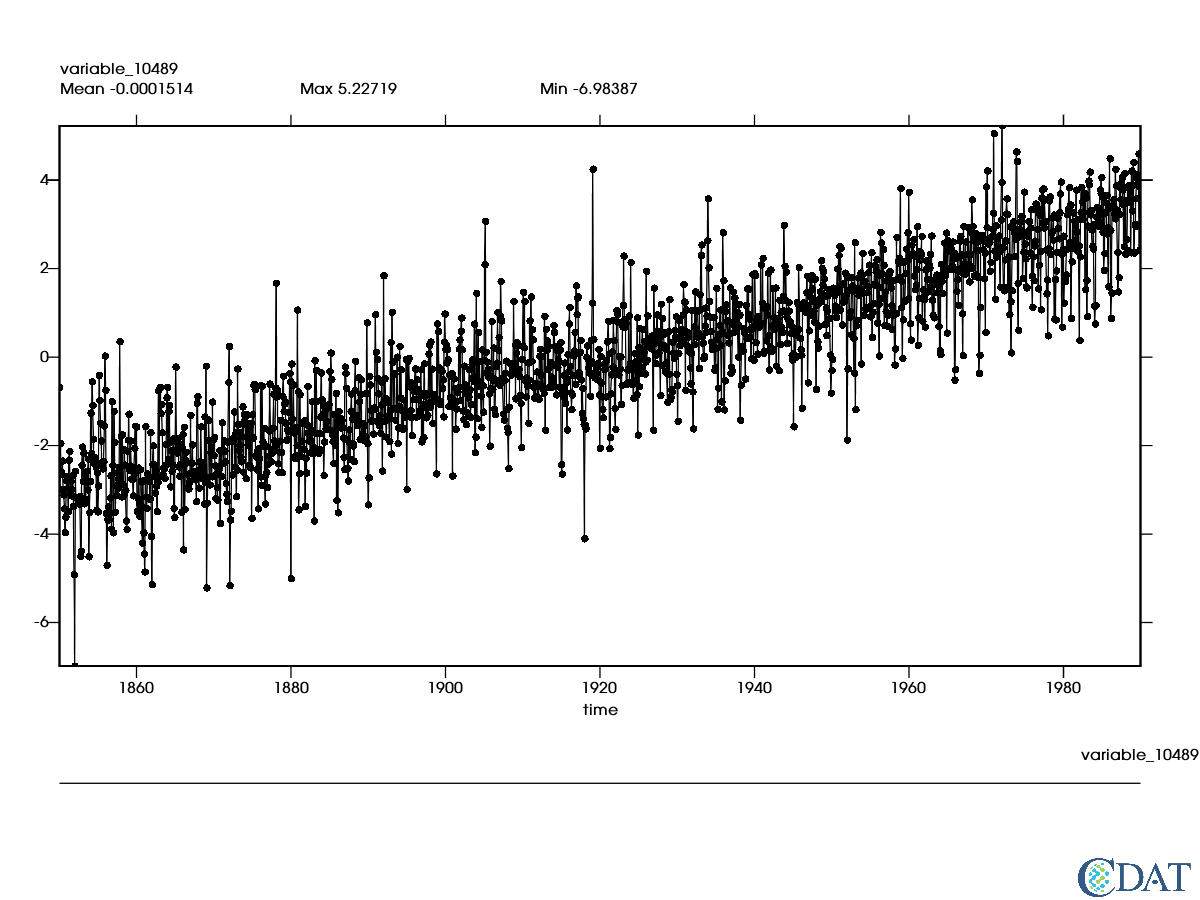

In [22]:
x.clear()
x.plot(datamskd_ts_departures)

It is difficult to see the difference between the two test cases from the individual plots, so let's plot the difference between the end results from each test case: ```datamskd_departures_ts``` (remove annual cycle (departures), then create time series (ts)) and ```datamskd_ts_departures``` (create time series (ts), then remove annual cycle (departures)).

Please note the importance of the order of operation when missing data is present. The two time series are slightly different especially in the later years, where missing data occurs since more data values cross the temperature threshold to be removed (2 degrees cooler than the maximum temperature). If the order of operations did not matter, the two time series would be the same and the difference between the two would be zero for each time value.

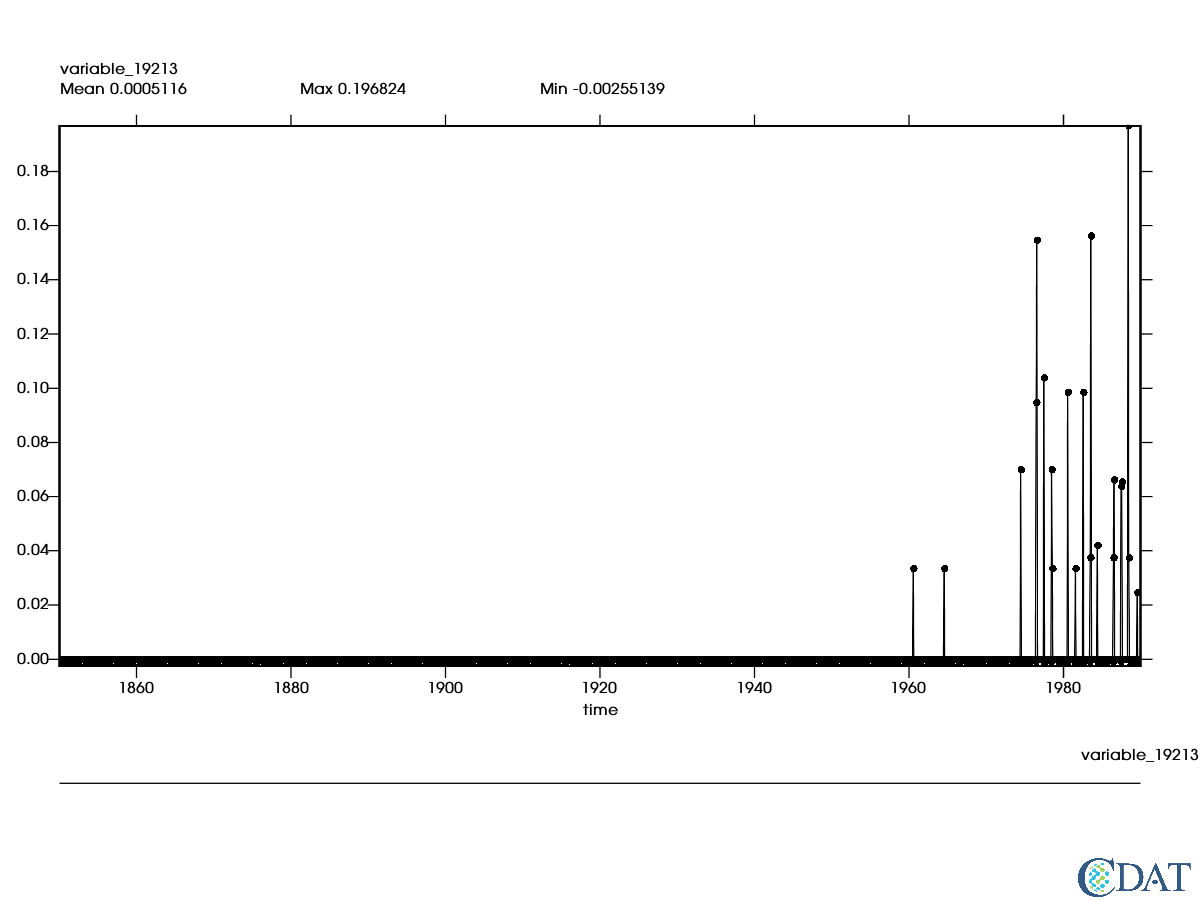

In [23]:
x.clear()
x.plot(datamskd_departures_ts - datamskd_ts_departures)

**NOTE: The correct order of operations is to first remove the annual cycle, then create a time series (i.e. Test Case 1).**

## Detrend Data
[Back to Top](#top)

### Set Up
First we will compute the trend over time. To do this we determine the slope (or coefficient) and intercept of the trend line where y = a*x + b and y = temperature; a = coefficent; x = time; and b = the intercept.

To remind ourselves of the dimensions of the ```datamskd_departures``` variable before we calculate the coefficient and intercept, let's look at the shape of the ```datamskd_departures``` variable which is the masked temperature data across the US with the annual cycle removed.

In [24]:
datamskd_departures.shape

(1680, 13, 16)

Now let's calculate the coefficient and the intercept of the trend as a function of latitude and longitude, which gives a single trend line over time for each grid cell. 

The index of time ```t``` can be expressed in any units (days, months, years, etc.) and `genutil` will determine its index.
**QUESTION FOR CHARLES: WHAT IS MEANT BY INDEX? IS IT THE LOCATION OF THE DIMENSION AS IN "TIME IS DIMENSION 0"?**

After computation we lose the time axis. 

The units for the coefficent are `K/day` since the time axis units are in `days since XXX`. **ASK KARL - DATA IS MONTHLY DATA, NOT DAILY SO SHOULDN'T THE UNITS BE K/MONTH?**

The units for the intercept are `K` since y is temperature. 

In [25]:
coeff, intercept = genutil.statistics.linearregression(datamskd_departures, axis="t")
print("Shapes: coeff {}, intercept {}".format(coeff.shape, intercept.shape))

Shapes: coeff (13, 16), intercept (13, 16)


Let's perform the same coefficient and intercept calculation for the time series (after we've removed the annual cycle). Again we'll remind ourselves of the dimensions of the data in the ```datamskd_departures_ts``` variable which represents a single temperature value for each time value in the dataset (after the annual cycle has been removed).

In [26]:
datamskd_departures_ts.shape

(1680,)

Calculating the coefficent and intercept:

In [27]:
coeff_ts, intercept_ts = genutil.statistics.linearregression(datamskd_departures_ts, axis="t")

For this time series, since it has no latitude or longitude dimensions (each temperature value represents the whole area of the dataset, namely the US), the coefficent and intercept are for a trend line and there is no latitude or longitude dimension to the resulting coefficient and intercept. The fact that no value is displayed within the ( ) means there is no dimensional information for that value and it is a scalar (i.e. just a number).

In [28]:
print("Shapes: coeff_ts {}, intercept_ts {}".format(coeff_ts.shape, intercept_ts.shape))

Shapes: coeff_ts (), intercept_ts ()


### Removing the Trend
[Back to Top](#top)

Before we can remove the warming trend in the data, we need to standardize the time axis. We use the ```.getTime``` and ```.setAxis``` methods on the masked data (```datamskd```) and store the result in the variable `times`.

**QUESTION FOR CHARLES: IS STANDARDIZING THE TIME AXIS A TRUE STATEMENT OF WHY WE NEED TO USE .getTime AND .setAxis? OR DO WE RUN THE NEXT TWO LINES OF CODE TO GIVE US A TIME AXIS WE CAN USE FOR GROWING THE COEFFICIENT AND INTERCEPT OF ```datamskd_departures``` (THE MASKED DATA WHERE THE ANNUAL CYCLE HAS BEEN REMOVED BUT THE TIME SERIES HAS NOT YET BEEN CREATED)? OR ARE BOTH REASONS VALID?**

In [29]:
times = MV2.array(datamskd.getTime()[:])
times.setAxis(0, datamskd.getTime())
times.shape

(1680,)

In [30]:
times.info

<bound method AbstractVariable.info of variable_19436
masked_array(data=[1.55000e+01, 4.50000e+01, 7.45000e+01, ...,
                   5.10235e+04, 5.10540e+04, 5.10845e+04],
             mask=False,
       fill_value=1e+20)
>

**QUESTION FOR CHARLES: IS ```.info``` THE BEST WAY TO SEE WHAT THE FIRST FEW VALUES OF A VARIBLE ARE OR IS THERE A BETTER WAY?**

Since time is not necessarily ***on index 0***, we need to use the grower function to expand the ```times``` variable to cover the entire area of the dataset which will add the latitude and longitude dimensions back in. The ```.grower``` method takes the values in the second argument (the 1-dimensional `times` variable here) and copies (or grows) the values to match the dimensions of the first argument (the 3-dimensional ```datamskd_departures``` variable here) to yield variables (```tmp``` and ```full_times```) with the same dimensions as the first argument).

We use data as the first argument to ensure the same order.

**QUESTIONS FOR CHARLES:**
1. WHAT DOES "on index 0" mean? IS IT "Since time is not necessarily the 0th dimension"? AND IF SO, HOW IS THAT POSSIBLE? OR DO YOU MEAN "Since `times` is not a 3-dimensional variable, but it needs to be for future calculations, we need to use the grower function..."?

2. WHEN YOU SAY "We use data as the first argument to ensure the same order." DO YOU MEAN THE SAME ORDER OF THE DIMENSIONS (13, 16) (BUT HOW COULD THE DIMENSIONS BE IN A DIFFERENT ORDER LIKE (16, 13)? OR DO YOU MEAN SOMETHING LIKE "We use ```datamskd_departures``` as the first argument to ensure the resulting data variable has the same dimensions as ```datamskd_departures```."

3. WHY ARE YOU USING ```datamskd_departures``` TO CREATE full_times, BUT ```datamskd``` TO GROW ```coeff``` AND ```intercept```? COULD WE USE ```datamskd_departures``` FOR ALL THREE GROWER COMMANDS - THAT 1ST ARGUMENT IS JUST TO SUPPLY THE DIMENSIONS, CORRECT? NO ACTUAL VALUES FROM THE 1ST ARGUMENT ARE USED IN THE .grower METHOD, ARE THEY?

4. WHAT IS THE ```tmp``` VARIABLE USED FOR? IT DOESN'T SEEM TO BE USED ANYWHERE AFTER IT IS CREATED.

In [31]:
tmp, full_times = genutil.grower(datamskd_departures, times)
print("Shapes: tmp {}, full_times {}".format(tmp.shape, full_times.shape))

Shapes: tmp (1680, 13, 16), full_times (1680, 13, 16)


In [32]:
full_times.info

<bound method AbstractVariable.info of variable_19449
masked_array(
  data=[[[1.55000e+01, 1.55000e+01, 1.55000e+01, ..., 1.55000e+01,
          1.55000e+01, 1.55000e+01],
         [1.55000e+01, 1.55000e+01, 1.55000e+01, ..., 1.55000e+01,
          1.55000e+01, 1.55000e+01],
         [1.55000e+01, 1.55000e+01, 1.55000e+01, ..., 1.55000e+01,
          1.55000e+01, 1.55000e+01],
         ...,
         [1.55000e+01, 1.55000e+01, 1.55000e+01, ..., 1.55000e+01,
          1.55000e+01, 1.55000e+01],
         [1.55000e+01, 1.55000e+01, 1.55000e+01, ..., 1.55000e+01,
          1.55000e+01, 1.55000e+01],
         [1.55000e+01, 1.55000e+01, 1.55000e+01, ..., 1.55000e+01,
          1.55000e+01, 1.55000e+01]],

        [[4.50000e+01, 4.50000e+01, 4.50000e+01, ..., 4.50000e+01,
          4.50000e+01, 4.50000e+01],
         [4.50000e+01, 4.50000e+01, 4.50000e+01, ..., 4.50000e+01,
          4.50000e+01, 4.50000e+01],
         [4.50000e+01, 4.50000e+01, 4.50000e+01, ..., 4.50000e+01,
          4.50000

Now apply the same "grower" function to the coefficient.
As a reminder, we'll view the shape of ```coeff``` first.

In [33]:
coeff.shape

(13, 16)

In [34]:
tmp, coeff_full = genutil.grower(datamskd, coeff)
print("Shapes: tmp {}, coeff_full {}".format(tmp.shape, coeff_full.shape))

Shapes: tmp (1680, 13, 16), coeff_full (1680, 13, 16)


Now grow the intercept.
Again, as a reminder, we'll view the shape of ```intercept``` first.

In [35]:
intercept.shape

(13, 16)

In [36]:
tmp, intercept_full = genutil.grower(datamskd, intercept)
print("Shapes: tmp {}, intercept_full {}".format(tmp.shape, intercept_full.shape))

Shapes: tmp (1680, 13, 16), intercept_full (1680, 13, 16)


To remove the trend from the spatially distributed data, we take the ```datamskd_departures``` (the masked data with the annual cycle removed) and subtract the trend plane which is represented by the right-hand side of the equation y = a*x + b which is ```full_times * coeff_full + intercept_full```.   (The right side of the equation becomes ```- full_times * coeff_full - intercept_full``` when you subtract it from ```datamskd_departures```.)

**QUESTION FOR KARL: IS THE TREND A "PLANE" OR IS IT "A SINGLE TREND LINE FOR EACH GRID CELL" AS MENTIONED ABOVE?**

**QUESTION FOR CHARLES AND/OR KARL: WHY DO THE ```coeff_full``` AND ```intercept_full``` HAVE A TIME DIMENSION? ABOVE ```coeff``` AND ```intercept``` HAD ONLY LAT AND LONG DIMENSIONS.**

In [37]:
datamskd_departures_detrend = datamskd_departures - full_times * coeff_full - intercept_full
datamskd_departures_detrend.shape

(1680, 13, 16)

To remove the trend from the masked data that has had the annual cycle removed and has been converted to a time series (```datamskd_departures_ts```), we subtract the corresponding values for "a" (```times```), the coefficient (```coeff_ts```) and the intercept (```intercept_ts```). 

To remind us of the dimensions of these values, we'll take a quick look at the shapes of the values before removing the trend. As mentioned above, if no value is displayed within the ( ), that means there is no dimensional information for that value and it is a scalar (i.e. just a number).

In [38]:
datamskd_departures_ts.shape

(1680,)

In [39]:
times.shape

(1680,)

In [40]:
coeff_ts.shape

()

In [41]:
intercept_ts.shape

()

In [42]:
datamskd_departures_ts_detrend = datamskd_departures_ts - times * coeff_ts - intercept_ts
datamskd_departures_ts_detrend.shape

(1680,)

Now we'll plot the time series with the trend removed.

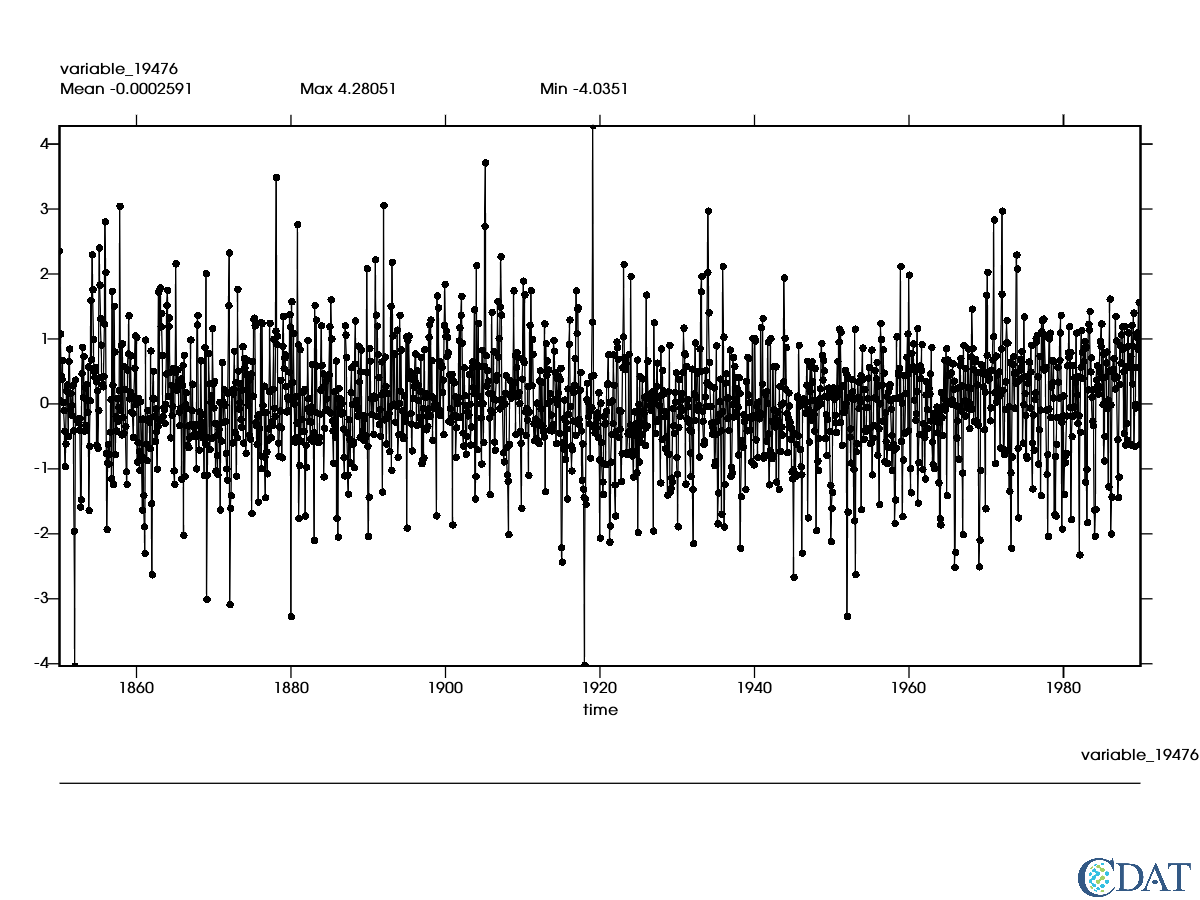

In [43]:
x.clear()
x.plot(datamskd_departures_ts_detrend)

Here, again, the order matters.

For comparison, we'll create a time series from the masked data with both the annual cycle and the warming trend removed and call it ```datamskd_departures_detrend_ts```.

In [44]:
datamskd_departures_detrend_ts = genutil.averager(datamskd_departures_detrend, axis='xy')
datamskd_departures_detrend_ts.shape

(1680,)

Now that we have two different ways we've gotten to the end result, we'll subtract one from the other and plot the difference. 

(To recap: ```datamskd_departures_detrend_ts``` was created by removing the annual cycle from the masked data, then removing the trend, then creating a time series by averaging over the whole spatial area of the dataset, and ```datamskd_departures_ts_detrend``` was created by removing the annual cycle from the masked data, then creating a spatially averaged time series, then removing the warming trend.)

The correct way to perform these steps is to remove the annual cycle from the masked data, then create a spatially averaged time series, then remove the warming trend (```datamskd_departures_ts_detrend```).

**QUESTION: DID I ACCURATELY REPRESENT THE CORRECT WAY TO DO THINGS?**

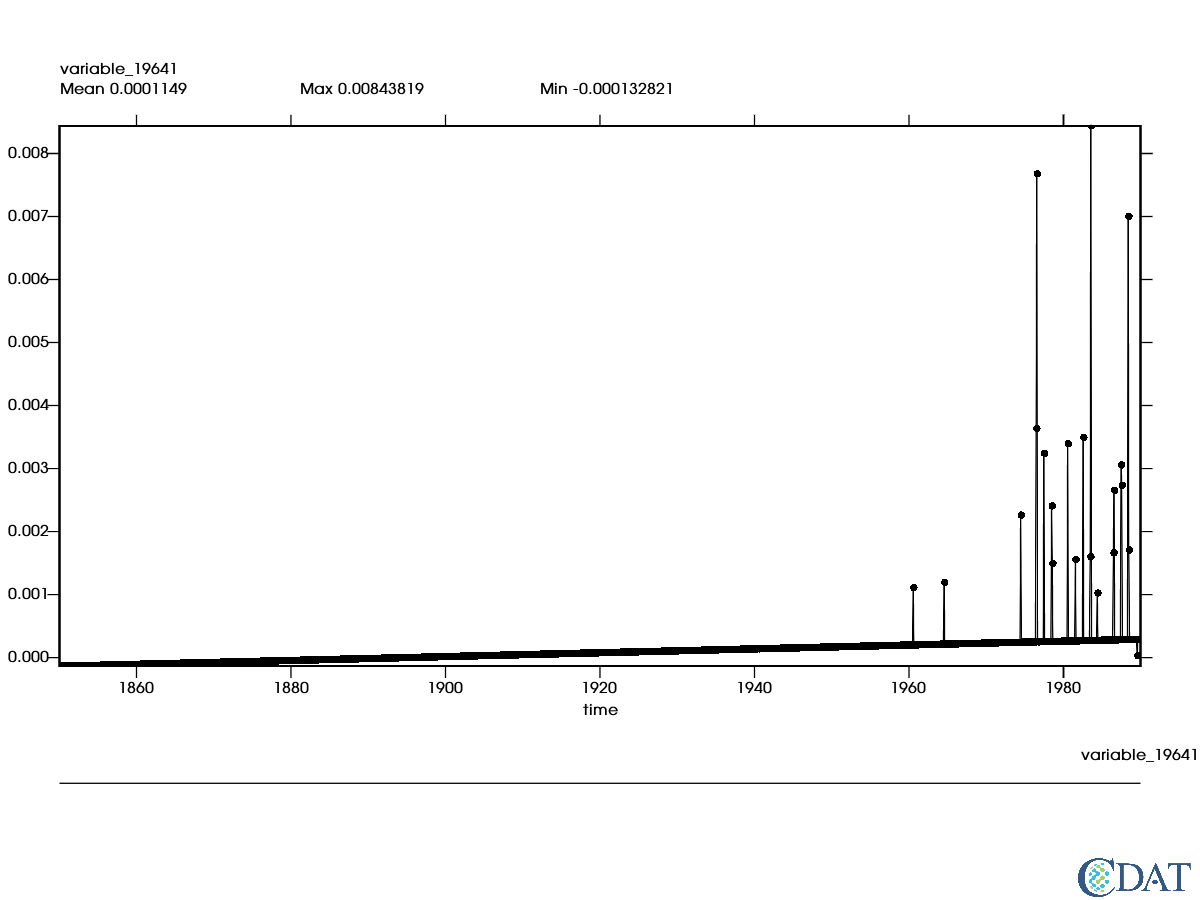

In [45]:
x.clear()
x.plot(datamskd_departures_detrend_ts - datamskd_departures_ts_detrend)

**QUESTION TO RESOLVE: WHY IS THERE A TREND TO THIS DATA? THE PREVIOUS "SUBTRACTIVE" PLOT HAD 0 VALUES WHERE THERE WAS NO DIFFERENCE BETWEEN THE TWO METHODS OR TEST CASES.**

[Back to Top](#top)

The CDAT software was developed by LLNL. This tutorial was written by Charles Doutriaux and Holly Davis with input from Karl Taylor. This work was performed under the auspices of the U.S. Department of Energy by Lawrence Livermore National Laboratory under Contract DE-AC52-07NA27344.

**KARL, I'M FINE LISTING YOU AS AN AUTHOR RATHER THAN AS JUST PROVIDING INPUT - LET ME KNOW WHAT YOU PREFER.**